In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [9]:
dt = pd.read_csv("3.12.+Example.csv")
dt.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


# Plot the Data

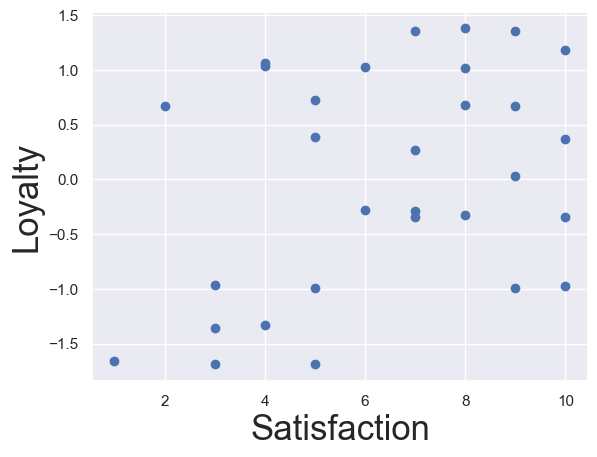

In [11]:
plt.scatter(dt["Satisfaction"], dt["Loyalty"])
plt.xlabel("Satisfaction", fontsize=25)
plt.ylabel("Loyalty", fontsize=25)
plt.show()

# Select the Features

In [13]:
x = dt.copy()

# Clustering

In [15]:
kmeans = KMeans(2)
kmeans.fit(x)


C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

# Clustering result

In [17]:
clusters = x.copy()
clusters["Cluster_pred"] = kmeans.fit_predict(x)
clusters

C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Satisfaction,Loyalty,Cluster_pred
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


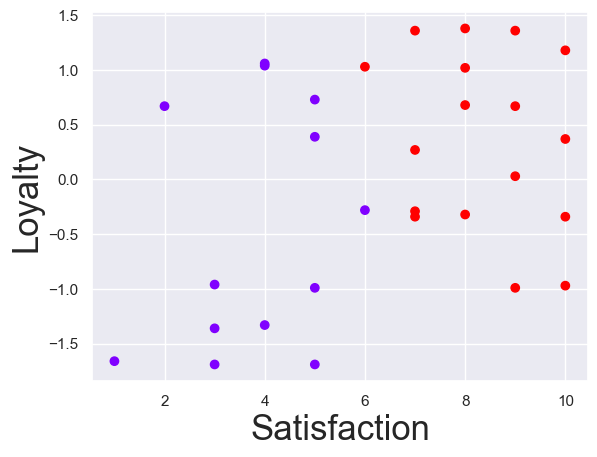

In [19]:
plt.scatter(clusters["Satisfaction"], clusters["Loyalty"], c=clusters["Cluster_pred"], cmap="rainbow")
plt.xlabel("Satisfaction", fontsize=25)
plt.ylabel("Loyalty", fontsize=25)
plt.show()

- #### we would expect 5 more red clusters. Because algorith thinnks satisfaction is more important than loyalty. that's why it split 2 sides, left and right

# Standardize the variables

In [23]:
from sklearn import preprocessing

In [25]:
x_scaled = preprocessing.scale(x)
# scales each variable seperately (standardizes with mean 0 and standard deviation of 1 by default)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

# Take advantage of the Elbow Method

- #### we are not sure about number of clusters. That's why we need to use elbow method 

In [29]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.24718180592842,
 7.792695153937187,
 6.571285077136384,
 5.348079410290981,
 4.430999057496254,
 3.7576929718931127]

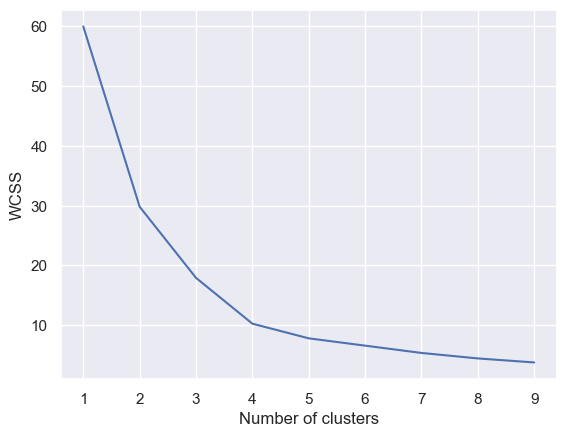

In [31]:
plt.plot(range(1,10), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

- #### we can use 2-3-4-5 clusters. 

# Explore clustering solutions and select the number of clusters

## solution for 2 clusters

C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

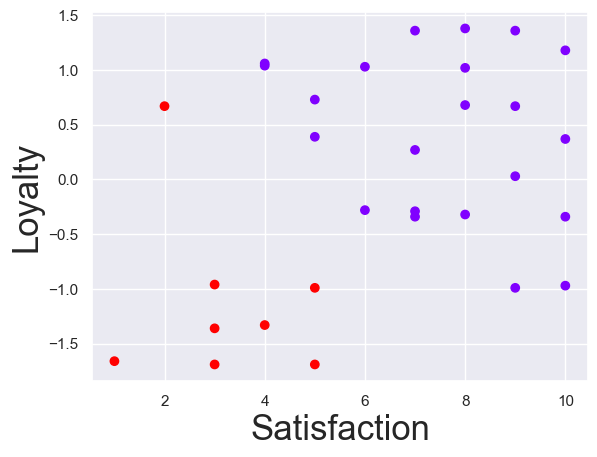

In [39]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
dt_new = x.copy()
dt_new["clusters_pred"] = kmeans_new.fit_predict(x_scaled)

plt.scatter(dt_new["Satisfaction"], dt_new["Loyalty"], c=dt_new["clusters_pred"], cmap="rainbow")
plt.xlabel("Satisfaction", fontsize=25)
plt.ylabel("Loyalty", fontsize=25)
plt.show()

- #### both loyalty and satisfaction is important equally for our algorithm now 

## solution for 3 cluster

C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

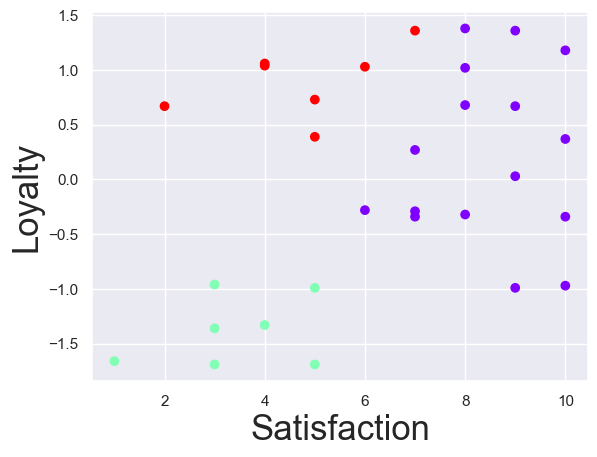

In [42]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
dt_new = x.copy()
dt_new["clusters_pred"] = kmeans_new.fit_predict(x_scaled)

plt.scatter(dt_new["Satisfaction"], dt_new["Loyalty"], c=dt_new["clusters_pred"], cmap="rainbow")
plt.xlabel("Satisfaction", fontsize=25)
plt.ylabel("Loyalty", fontsize=25)
plt.show()

- #### we can see that greens are alienated, reds are supporters but we can make any comments for purples. that's why we need to continue to try

## Solution for 4 clusters

C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

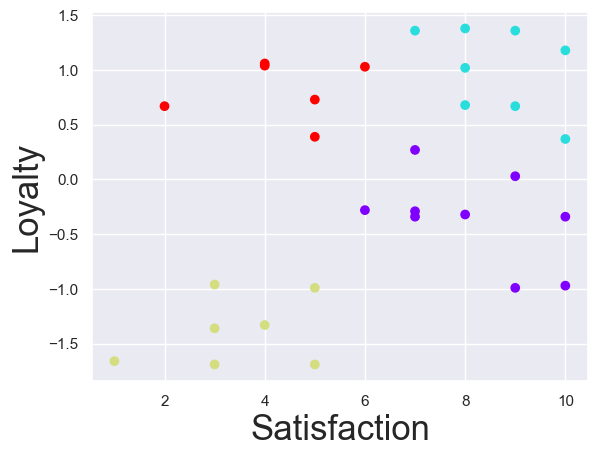

In [46]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
dt_new = x.copy()
dt_new["clusters_pred"] = kmeans_new.fit_predict(x_scaled)

plt.scatter(dt_new["Satisfaction"], dt_new["Loyalty"], c=dt_new["clusters_pred"], cmap="rainbow")
plt.xlabel("Satisfaction", fontsize=25)
plt.ylabel("Loyalty", fontsize=25)
plt.show()

- #### now we can comment for all clusters. Yellows are alienated, reds are supporters, blues are fans and the purples are roamers